Names: Alex Huang, Vicente Valenzuela, Farrukh Chishtie, Yuki Torigata, Sayana Imash, Fong Ken Rui

In [1]:
# your import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## WorkSheet Instructions ##

Before you begin you should have read and worked through Lab 3.

 I recommend that you do this worksheet in a python
  notebook and share screen.  This method does mean one person will do the typing.  When complete, print or Latex to pdf and upload to CANVAS.
  
*This worksheet is based on Question 2 from the lab*

### Question A ###

Compute the condition number for the matrix that arises from the Heat Equation using Dirchlet BC for various values of the number of segments, N, the rod is divided into. Note that N segments means N+1 grid points. Consider values of N between 5 and 50.  Remember that python starts counting from 0 (not 1).

(Hint: This will be much easier if you write a small Python function that outputs the matrix for a given value of N.)

The Matrix is:


$$A_1 = {\left[
          \begin{array}{ccccccccc}
            1&  0  & & \dots  & & & & & 0 \\
            1& {-2} & {1} & {0} & {\dots} & && &  \\
            0& {1} & {-2} &  {1} & {0} & {\dots} & & &  \\
            & {0} & {1}  & {-2} & {1} & {0} & {\dots} & &  \\
            & & & & & & & & \\
            \vdots & & & {\ddots} & {\ddots} & {\ddots} & {\ddots} & {\ddots} & \vdots \\
            & & & & & & & & \\
            & & & {\dots} & {0} & {1} & {-2} & {1} & 0 \\
            & &  & &{\dots} & {0} & {1} & {-2} & 1 \\
            0& & & & & \dots & & 0 & 1 \\
          \end{array}
        \right]}
$$    

In [2]:
# function that outputs matrix for a given value of N
def create_Matrix(N):
    stencil = np.array([1, -2, 1])
    matrix = np.zeros(shape=(N,N))
    for i in range(1, N-1):
        j = i - 1
        matrix[i, j:j+3] = stencil
    matrix[0,0]=1
    matrix[-1,-1]=1
    return matrix

In [3]:
# cell to calculate the condition number for various N
# N_arr = np.array([10**x for x in range(1, 7)])
N_arr = np.array(range(5,51))
print(N_arr)
cond_list = [] 
for N in N_arr:
    cond_number = np.linalg.cond(create_Matrix(N))
    cond_list.append(cond_number)
cond_arr = np.array(cond_list)
print(cond_arr)


[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
[  7.64390581  10.99460032  15.23311899  20.33652615  26.28708642
  33.07381141  40.68975498  49.13030204  58.39225245  68.47331059
  79.37178441  91.08639877 103.6161745  116.9603475  131.11831298
 146.08958623 161.87377438 178.47055573 195.87966446 214.10087905
 233.13401347 252.97891039 273.63543586 295.10347518 317.38292953
 340.47371337 364.37575226 389.08898114 414.61334289 440.94878717
 468.09526945 496.05275018 524.82119413 554.40056982 584.79084902
 615.99200636 648.00401895 680.82686612 714.46052914 748.904991
 784.16023621 820.22625064 857.1030214  894.79053664 933.28878553
 972.59775809]


### Question B ###

Plot your results on a log-log plot (that is log condition number versus log N)

Also plot N$^2$ on the same plot.

How does the conition number of A$_1$ depend on N?

The condition number of A$_1$ scales with N$^2$

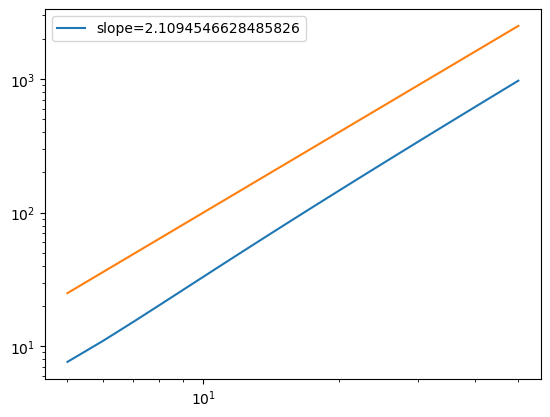

In [4]:
# code to do the plot
slope = linregress(np.log(N_arr), np.log(cond_arr)).slope
plt.loglog(N_arr, cond_arr, label=f"slope={slope}")
plt.loglog(N_arr, N_arr**2)
plt.legend()

### Question C ###

Another way to write the system of equations is to substitute the
boundary conditions into the equations, and thereby reduce size of the
problem to one of N-1 equations in N-1 unknowns. The corresponding
matrix is simply the N-1 by N-1 submatrix of A$_1$
$$A_2 = {\left[
    \begin{array}{ccccccc}
    -2 &  1 &  0 & \dots & && 0 \\
    1 & -2 &  1 & 0 & \dots & & \\
    0 & 1  & -2 & 1 & 0 & \dots &  \\
    & & & & & & \\
    \vdots & & \ddots & \ddots& \ddots & \ddots & \vdots\\
    & & & & & & 0 \\
    & & \dots & 0 & 1 & -2 & 1 \\
    0&  & &\dots & 0 & 1 & -2 \\
    \end{array}
    \right]}
    $$ 
    
Does this change in the matrix make a significant difference in the
    condition number?

No it does not make a significan difference in the condition number.

In [5]:
# new function that outputs the matrix A_2 for a given value of N
def create_A_2(N):
    matrix = create_Matrix(N)
    return matrix[1:-1, 1:-1]

print(create_A_2(10))

[[-2.  1.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.]]


In [6]:
# cell to calculate the condition number for various N
# cell to calculate the condition number for various N
# N_arr = np.array([10**x for x in range(1, 7)])
N_arr = np.array(range(5,51))
print(N_arr)
cond_list = [] 
for N in N_arr:
    cond_number = np.linalg.cond(create_A_2(N))
    cond_list.append(cond_number)
cond_arr = np.array(cond_list)
print(cond_arr)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
[  5.82842712   9.47213595  13.92820323  19.19566936  25.27414237
  32.16343748  39.86345819  48.37415008  57.69548054  67.82742907
  78.76998224  90.52313097 103.08686892 116.46119158 130.64609564
 145.64157867 161.4476388  178.06427461 195.491485   213.7292691
 232.77762622 252.63655579 273.30605738 294.7861306  317.07677515
 340.17799079 364.0897773  388.81213449 414.34506223 440.68856038
 467.84262884 495.8072675  524.5824763  554.16825515 584.564604
 615.77152279 647.78901148 680.61707002 714.25569838 748.70489653
 783.96466444 820.03500208 856.91590943 894.60738648 933.10943319
 972.42204956]


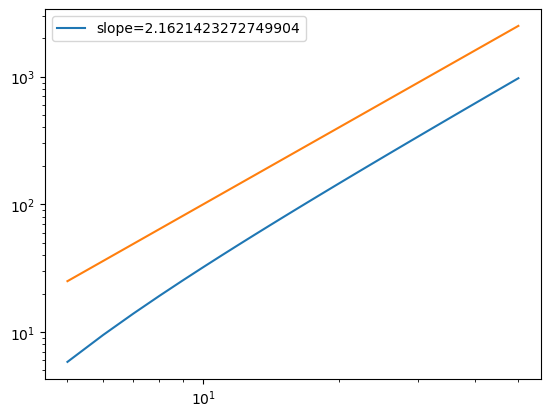

In [7]:
# log log plot comparing
slope = linregress(np.log(N_arr), np.log(cond_arr)).slope
plt.loglog(N_arr, cond_arr, label=f"slope={slope}")
plt.loglog(N_arr, N_arr**2)
plt.legend()